In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [337]:
#renamed file name
Data = pd.read_csv('MultipleLR2.csv', sep=',',header=None)

In [338]:
Data

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [339]:
x = Data.loc[:,:2]
y = Data.loc[:,3]

In [340]:
x

,0,1,2
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [341]:
y

0     152
1     185
2     180
3     196
4     142
5     101
6     149
7     115
8     175
9     164
10    141
11    141
12    184
13    152
14    148
15    192
16    147
17    183
18    177
19    159
20    177
21    175
22    175
23    149
24    192
Name: 3, dtype: int64

In [342]:
xThetas = np.ones(25)
x.insert(0,'thetas', xThetas, True)

In [343]:
x = np.array(x)

In [344]:
y = np.array(y)
y = y.reshape(y.shape[0],1)

In [345]:
#cost function
def J(h,y):
    j = 1/(2*len(y)) * sum((h-y)**2)
    return j

#gradient
def calcGradient(x,y,h):
    theta = 1/len(y) * (h-y).T@x
    return theta

In [346]:
def ADAM_B(x,y,beta1, beta2, lr, epsilon, iterations):
    thetas = np.zeros([4,1], dtype = float)
    costs  = []
    vthetast = np.zeros([4,1], dtype = float)
    mthetast = np.zeros([4,1], dtype = float)
    hs = []
    thetass = []
    for i in range(0,iterations):
        h = x@thetas
        j = J(h, y)
        costs.append(j)
        gthetas = calcGradient(x,y,h).T

        mthetast = beta1*mthetast + (1-beta1)*(gthetas)

        vthetast =  beta2*vthetast + (1-beta2)*(gthetas)**2

        # bias correction
        mthetas = mthetast/(1-beta1**(i+1))

        vthetas = vthetast/(1-beta2**(i+1))

        thetas = thetas - lr/(np.sqrt(vthetas)+epsilon)*mthetas

        thetass.append(thetas)
        if(i > 1):
            if (abs(popCost[i]-popCost[i-1])) < 0.01:
                break
            if (thetass[i][0]-thetass[i-1][0]) < 0.001:
                break 
    return thetas, costs, thetass, vthetas, hs

In [347]:
thetas, costs, thetass, vthetas, hs = ADAM_B(x,y,0.7,0.84,0.01,1e-8,1500)
thetas

array([[0.67642956],
       [0.67624802],
       [0.67618763],
       [0.67753881]])

In [348]:
ypred = x@thetas
R2 = r2_score(y, ypred)
R2

0.9763930469455354

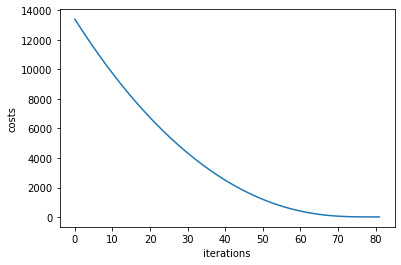

In [349]:
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.show()

In [350]:
thetas0 = []
thetas1 = []
thetas2 = []
thetas3 = []
for array in thetass:
    thetas0.append(array[0])
    thetas1.append(array[1])
    thetas2.append(array[2])
    thetas3.append(array[3])

thetas0 = np.reshape(thetas0, (1, 82)).T
thetas1 = np.reshape(thetas1, (1, 82)).T
thetas2 = np.reshape(thetas2, (1, 82)).T
thetas3 = np.reshape(thetas3, (1, 82)).T

Text(0, 0.5, 'Cost Value')

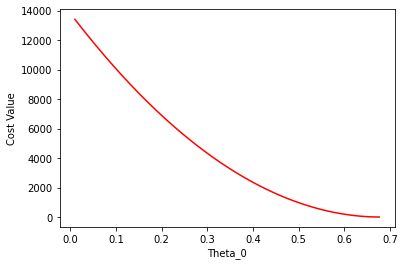

In [351]:
fig,ax = plt.subplots()
ax.plot(thetas0, costs[:82] ,'r')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

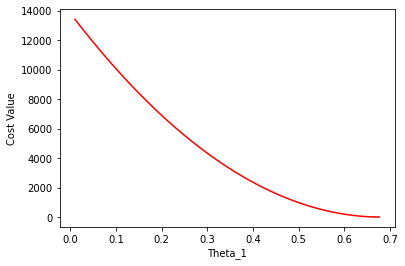

In [352]:
fig,ax = plt.subplots()
ax.plot(thetas1, costs[:82] ,'r')
ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

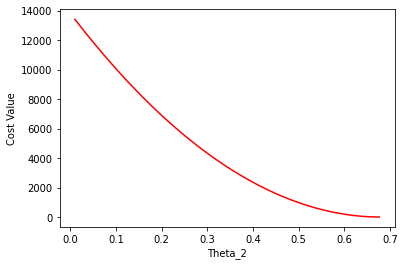

In [353]:
fig,ax = plt.subplots()
ax.plot(thetas2, costs[:82] ,'r')
ax.set_xlabel('Theta_2')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

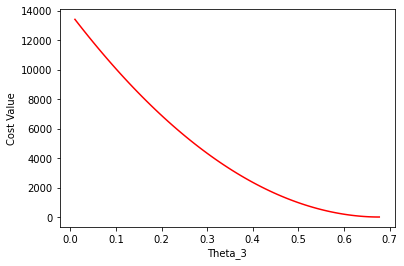

In [354]:
fig,ax = plt.subplots()
ax.plot(thetas3, costs[:82] ,'r')
ax.set_xlabel('Theta_3')
ax.set_ylabel('Cost Value')

In [355]:
def ADAM_MiniB(x,y,beta1, beta2, lr, epsilon, iterations, bsize):
    thetas = np.zeros([4,1], dtype = float)
    costs  = []
    vthetast = np.zeros([4,1], dtype = float)
    mthetast = np.zeros([4,1], dtype = float)
    hs = []
    thetass = []
    popCost = [J(x@thetas, y)]
    for i in range(0,iterations):
        for j in range(0,bsize):
            start = int(j*(len(x)/bsize))
            end = int(start+(len(x)-1/bsize))
            X = x[start:end]
            Y = y[start:end]
            h = X@thetas
            j = J(h, Y)
            costs.append(j)
            gthetas = calcGradient(X,Y,h).T

            mthetast = beta1*mthetast + (1-beta1)*(gthetas)

            vthetast =  beta2*vthetast + (1-beta2)*(gthetas)**2

            # bias correction
            mthetas = mthetast/(1-beta1**(i+1))

            vthetas = vthetast/(1-beta2**(i+1))

            thetas = thetas - lr/(np.sqrt(vthetas)+epsilon)*mthetas

        thetass.append(thetas)
        popCost.append(J(x@thetas, y))
        if(i > 1):
            if (abs(popCost[i]-popCost[i-1])) < 0.01:
                break
            if (thetass[i][0]-thetass[i-1][0]) < 0.001:
                break 
    return thetas, costs, popCost, thetass, vthetas, hs

In [356]:
thetas, costs, popCost, thetass, vthetas, hs = ADAM_MiniB(x,y,0.8,0.5,0.001,0.000001,1000,5)
thetas

array([[0.67719446],
       [0.67682789],
       [0.67669495],
       [0.67854192]])

In [357]:
ypred = x@thetas
R2 = r2_score(y, ypred)
R2

0.9757304830517288

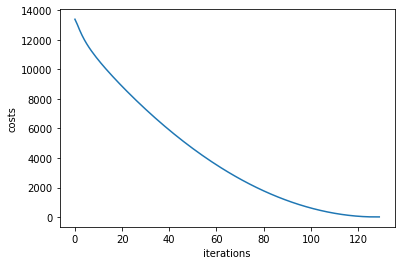

In [358]:
plt.plot(popCost)
plt.xlabel('iterations')
plt.ylabel('costs')
plt.show()

In [359]:

thetas0 = []
thetas1 = []
thetas2 = []
thetas3 = []
for array in thetass:
    thetas0.append(array[0])
    thetas1.append(array[1])
    thetas2.append(array[2])
    thetas3.append(array[3])

thetas0 = np.reshape(thetas0, (1, 129)).T
thetas1 = np.reshape(thetas1, (1, 129)).T
thetas2 = np.reshape(thetas2, (1, 129)).T
thetas3 = np.reshape(thetas3, (1, 129)).T


Text(0, 0.5, 'Cost Value')

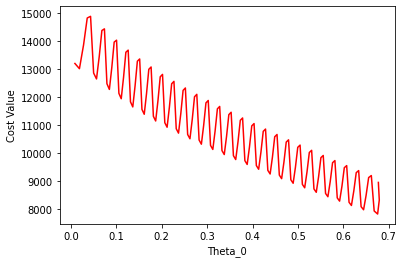

In [360]:
fig,ax = plt.subplots()
ax.plot(thetas0, costs[:129] ,'r')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

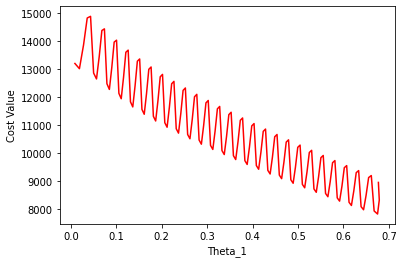

In [361]:
fig,ax = plt.subplots()
ax.plot(thetas1, costs[:129] ,'r')
ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

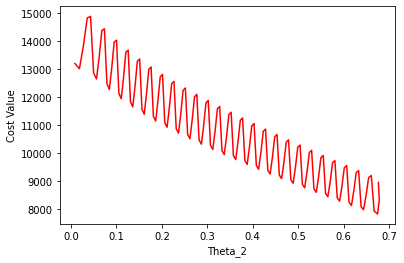

In [362]:
fig,ax = plt.subplots()
ax.plot(thetas2, costs[:129] ,'r')
ax.set_xlabel('Theta_2')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

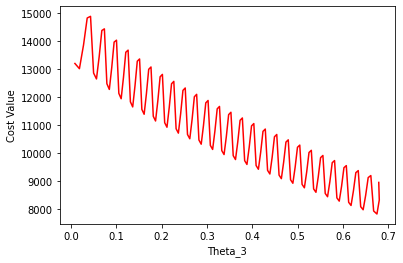

In [363]:
fig,ax = plt.subplots()
ax.plot(thetas3, costs[:129] ,'r')
ax.set_xlabel('Theta_3')
ax.set_ylabel('Cost Value')